In [36]:
import geopandas
import starepandas
import matplotlib.pyplot as plt

In [37]:
fname = 'zip://data/amapoly_ivb.zip'
amazon = geopandas.read_file(fname) # Nice flex
amazon = amazon.to_crs('EPSG:4326')
amazon['geom_simple'] = amazon.simplify(0.02)
amazon.set_geometry('geom_simple', inplace=True)

stare = starepandas.stare_from_gdf(amazon, level=10, force_ccw=True)
amazon = starepandas.STAREDataFrame(amazon, stare=stare)

trixels = amazon.trixels()
amazon.set_trixels(trixels, inplace=True)

In [59]:
countries = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
countries = countries.sort_values(by='name')
samerica = countries[countries.continent=='South America']

stare = starepandas.stare_from_gdf(samerica, level=2, force_ccw=True)
samerica = starepandas.STAREDataFrame(samerica, stare=stare)
trixels = samerica.trixels()
samerica.set_trixels(trixels, inplace=True)

In [60]:
stare_amazon = samerica.stare_intersection(amazon.stare.iloc[0])
samerica['stare_amazon'] = stare_amazon
samerica['trixel_amazon'] = samerica.trixels(stare_column='stare_amazon')

In [61]:
samerica

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,stare,trixels,stare_amazon,trixel_amazon
9,44293293,South America,Argentina,ARG,879400.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...","[1801439850948198402, 1801439850948198402, 263...","(POLYGON ((-45 -44.99999931245065, -75.3611931...",[],()
30,11138234,South America,Bolivia,BOL,78350.0,"POLYGON ((-69.52968 -10.95173, -68.78616 -11.0...","[2630102182384369666, 2666130979403333634, 270...","(POLYGON ((-45 -44.99999931245065, -62.7642760...","[2667256879310176263, 2667292613438078986, 266...",(POLYGON ((-72.27212084495716 1.58061521194582...
29,207353391,South America,Brazil,BRA,3081000.0,"POLYGON ((-53.37366 -33.76838, -53.65054 -33.2...","[2630102182384369666, 2666130979403333634, 273...","(POLYGON ((-45 -44.99999931245065, -62.7642760...","[2667256879310176263, 2667292613438078986, 266...",(POLYGON ((-72.27212084495716 1.58061521194582...
10,17789267,South America,Chile,CHL,436100.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.63335...","[1801439850948198402, 1801439850948198402, 263...","(POLYGON ((-45 -44.99999931245065, -75.3611931...",[],()
32,47698524,South America,Colombia,COL,688000.0,"POLYGON ((-66.87633 1.25336, -67.06505 1.13011...","[2485986994308513794, 2666130979403333634, 273...",(POLYGON ((-75.36119345626975 8.42105871140566...,"[2667256879310176263, 2667292613438078986, 266...",(POLYGON ((-72.27212084495716 1.58061521194582...
44,16290913,South America,Ecuador,ECU,182400.0,"POLYGON ((-75.37322 -0.15203, -75.23372 -0.911...","[2666130979403333634, 2918332558536081410]",(POLYGON ((-75.36119345626975 8.42105871140566...,"[2667256879310176263, 2667292613438078986, 266...",(POLYGON ((-72.27212084495716 1.58061521194582...
20,2931,South America,Falkland Is.,FLK,281.8,"POLYGON ((-61.20000 -51.85000, -60.00000 -51.2...",[1801439850948198402],"POLYGON ((-45 -44.99999931245065, -75.36119310...",[],()
41,737718,South America,Guyana,GUY,6093.0,"POLYGON ((-56.53939 1.89952, -56.78270 1.86371...",[2738188573441261570],"POLYGON ((-75.36119345626975 8.42105871140566,...","[2738751523394682887, 2738786707766771719, 273...",(POLYGON ((-72.27212084495716 1.58061521194582...
156,6943739,South America,Paraguay,PRY,64670.0,"POLYGON ((-58.16639 -20.17670, -57.87067 -20.7...","[2630102182384369666, 2774217370460225538]","(POLYGON ((-45 -44.99999931245065, -62.7642760...",[],()
31,31036656,South America,Peru,PER,410400.0,"POLYGON ((-69.89364 -4.29819, -70.79477 -4.251...","[2666130979403333634, 2702159776422297602, 273...",(POLYGON ((-75.36119345626975 8.42105871140566...,"[2667256879310176263, 2667292613438078986, 266...",(POLYGON ((-72.27212084495716 1.58061521194582...


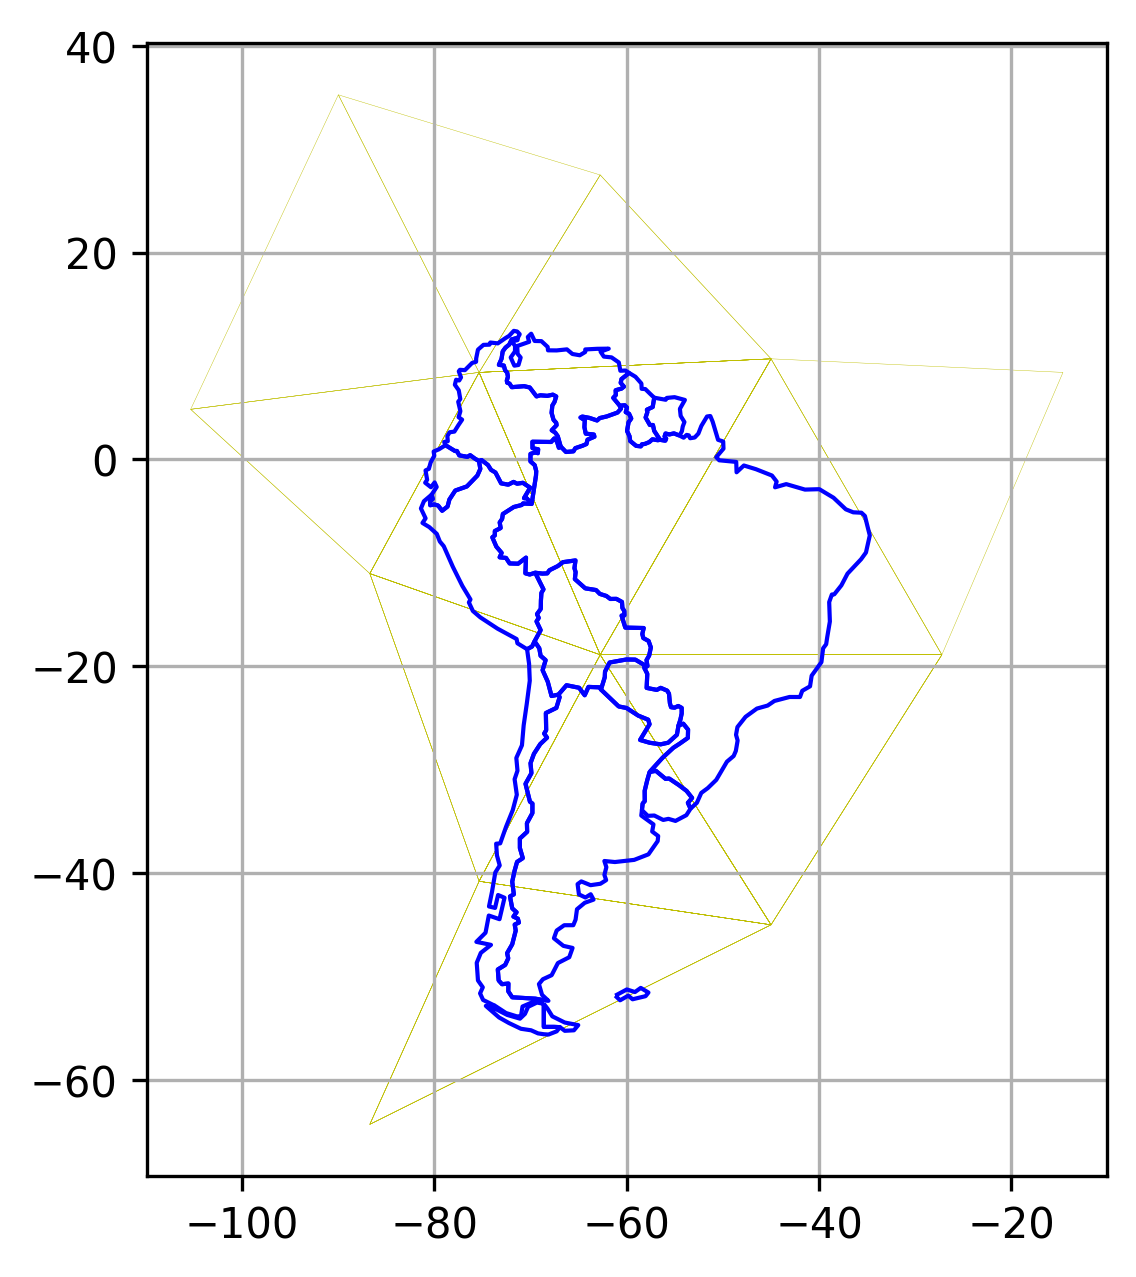

In [62]:
fig, ax = plt.subplots(figsize=(13,5), dpi=300)
ax.grid(True)

samerica.plot(ax=ax, trixels=True, color='y', lw=0.1, zorder=0)
samerica.plot(ax=ax, trixels=False, facecolor='none', edgecolor='blue', lw=1, zorder=4)
df = samerica.set_geometry('trixel_amazon')
df = df[df.geometry.is_empty==False]
df = df.set_geometry(df.geometry.boundary)
#df.plot(ax=ax, zorder=3, column='name', lw=0.5)